# RESUMEN ARCHIVO GASTO_MEDIO_CANARIAS 

# Proposito:

En este notebook nos dedicaremos explicar un poco que hay en el fichero...


In [1]:
%load_ext watermark
%watermark

Last updated: 2023-01-25T13:56:43.048478+00:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import numpy as np
import os
import re

# PREPARACION PREVIA

Primero necesitamos copiar todos nuestros archivos en una carpeta donde podramos manipularlos para así conservar los archivos originales

In [3]:
from distutils.dir_util import copy_tree

# Método que limpia la carpeta de datos volatiles ya que es 
# una carpeta activa en todos los programas que hemos generado.
def limpiaCarpetaVolatil(rutaCopia):
    print("Limpiando Carpeta Volatil...")
    for f in os.listdir(rutaCopia):
        os.remove(os.path.join(rutaCopia, f))
        
#Metodo que copia recursivamente
def copia(dir_origen,dir_destino):
    print("Copiando...")
    copy_tree(dir_origen, dir_destino)
    print("Copiado")
    print(os.listdir(dir_destino))
  


In [4]:
rutaBase= "../PredictorGastoTuristico/DatosPredictor/01"
rutaCopia= "../PredictorGastoTuristico/DatosVolatiles/"

limpiaCarpetaVolatil(rutaCopia)
copia(rutaBase,rutaCopia)

Limpiando Carpeta Volatil...
Copiando...
Copiado
['gasto_medio_canarias.csv']


## Primero cargamos los archivos para tratarlos y finalmente unirlos:

In [5]:
ruta = rutaCopia
list_csv_names = os.listdir(ruta)
index = 0
for archivo in list_csv_names:
    print(str(index) + " " + archivo)
    index = index + 1

0 gasto_medio_canarias.csv


In [6]:
gasto_medio_canarias = pd.read_csv(ruta+list_csv_names[0],keep_default_na=False, na_values=[""])

### VISUALIZACIÓN

In [11]:
gasto_medio_canarias.shape

(350, 27)

In [7]:
gasto_medio_canarias.head()

,fecha,pais,isla,total gasto por turista,gasto por turista alojamiento,gasto por turista transporte nacional / internacional,gasto por turista otros,Turistas Hombres De 15 a 24,Turistas Mujeres De 15 a 24,Turistas Hombres De 25 a 44,...,Turistas Hombres TOTAL EDADES,Turistas Mujeres TOTAL EDADES,Total Turistas por motivo: Ocio o vacaciones,Total Turistas por motivo: Otros motivos,Total Turistas por motivo: Personal,Total Turistas por motivo: TOTAL MOTIVOS,Total Turistas por motivo: Trabajo o negocios,Total Turistas: No contrataron un paquete turístico,Total Turistas: Sí contrataron un paquete turístico,Total Turistas: Total
0,2010Q1,Alemania,CANARIAS,1121.10,469.68,338.11,313.30,16718.0,15374.0,93932.0,...,300809.0,320111.0,604627.0,3633.0,8526.0,620920.0,4134.0,154831.0,466089.0,620920.0
1,2010Q1,Alemania,CANARIAS,1147.19,472.84,341.47,332.88,16718.0,15374.0,93932.0,...,300809.0,320111.0,604627.0,3633.0,8526.0,620920.0,4134.0,154831.0,466089.0,620920.0
2,2010Q1,España,CANARIAS,769.14,293.16,193.28,282.70,10179.0,8403.0,55682.0,...,180231.0,154998.0,270814.0,3700.0,7096.0,335230.0,53619.0,201097.0,134132.0,335230.0
3,2010Q1,España,CANARIAS,666.96,238.65,166.80,261.51,10179.0,8403.0,55682.0,...,180231.0,154998.0,270814.0,3700.0,7096.0,335230.0,53619.0,201097.0,134132.0,335230.0
4,2010Q1,Holanda,CANARIAS,1072.71,436.86,320.57,315.28,2861.0,2899.0,13466.0,...,46656.0,47784.0,90723.0,2245.0,511.0,94439.0,961.0,21215.0,73224.0,94439.0


### COLUMNAS

In [8]:
gasto_medio_canarias.columns

Index(['fecha', 'pais', 'isla', 'total gasto por turista',
       'gasto por turista alojamiento',
       'gasto por turista transporte nacional / internacional',
       'gasto por turista  otros', 'Turistas Hombres De 15 a 24',
       'Turistas Mujeres De 15 a 24', 'Turistas Hombres De 25 a 44',
       'Turistas Mujeres De 25 a 44', 'Turistas Hombres De 45 a 64',
       'Turistas Mujeres De 45 a 64', 'Turistas Hombres Mayor de 64',
       'Turistas Mujeres Mayor de 64', 'Turistas Hombres Menor de 15',
       'Turistas Mujeres Menor de 15', 'Turistas Hombres TOTAL EDADES',
       'Turistas Mujeres TOTAL EDADES',
       'Total Turistas por motivo: Ocio o vacaciones',
       'Total Turistas por motivo: Otros motivos',
       'Total Turistas por motivo: Personal',
       'Total Turistas por motivo: TOTAL MOTIVOS',
       'Total Turistas por motivo: Trabajo o negocios',
       'Total Turistas: No contrataron un paquete turístico',
       'Total Turistas: Sí contrataron un paquete turístico

### DATOS NULOS (NINGUNO)

In [10]:
gasto_medio_canarias.isnull().sum()

fecha                                                    0
pais                                                     0
isla                                                     0
total gasto por turista                                  0
gasto por turista alojamiento                            0
gasto por turista transporte nacional / internacional    0
gasto por turista  otros                                 0
Turistas Hombres De 15 a 24                              0
Turistas Mujeres De 15 a 24                              0
Turistas Hombres De 25 a 44                              0
Turistas Mujeres De 25 a 44                              0
Turistas Hombres De 45 a 64                              0
Turistas Mujeres De 45 a 64                              0
Turistas Hombres Mayor de 64                             0
Turistas Mujeres Mayor de 64                             0
Turistas Hombres Menor de 15                             0
Turistas Mujeres Menor de 15                            

### VALORES UNICOS POR COLUMNA

In [12]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))


In [13]:
unique_col_values(gasto_medio_canarias)

fecha | 40 | object
pais | 7 | object
isla | 1 | object
total gasto por turista | 350 | float64
gasto por turista alojamiento | 349 | float64
gasto por turista transporte nacional / internacional | 344 | float64
gasto por turista  otros | 345 | float64
Turistas Hombres De 15 a 24 | 278 | float64
Turistas Mujeres De 15 a 24 | 279 | float64
Turistas Hombres De 25 a 44 | 280 | float64
Turistas Mujeres De 25 a 44 | 279 | float64
Turistas Hombres De 45 a 64 | 280 | float64
Turistas Mujeres De 45 a 64 | 280 | float64
Turistas Hombres Mayor de 64 | 279 | float64
Turistas Mujeres Mayor de 64 | 280 | float64
Turistas Hombres Menor de 15 | 280 | float64
Turistas Mujeres Menor de 15 | 280 | float64
Turistas Hombres TOTAL EDADES | 280 | float64
Turistas Mujeres TOTAL EDADES | 280 | float64
Total Turistas por motivo: Ocio o vacaciones | 280 | float64
Total Turistas por motivo: Otros motivos | 275 | float64
Total Turistas por motivo: Personal | 276 | float64
Total Turistas por motivo: TOTAL MOTIVOS 

### ALGUNA VISUALIZACIÓN GRAFICA

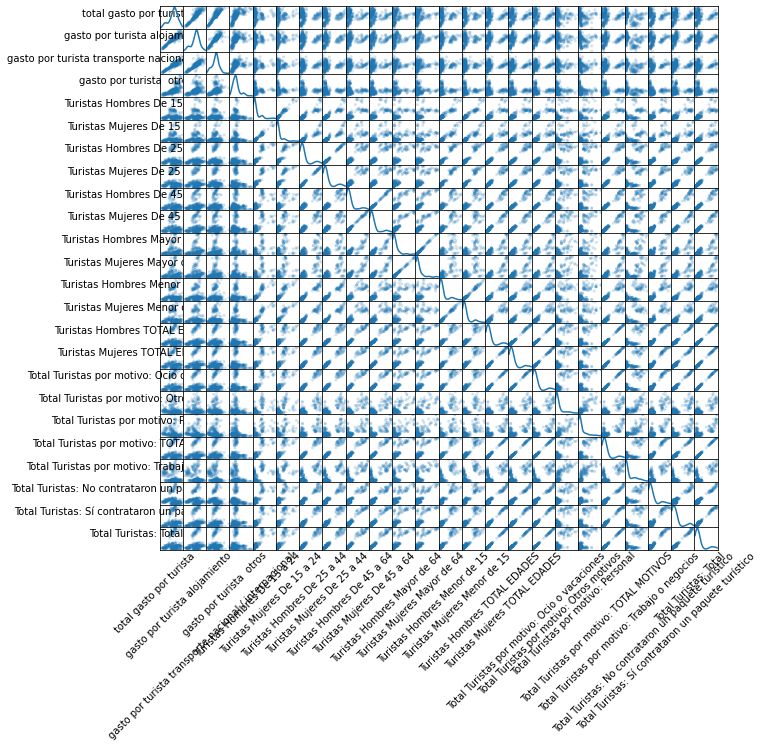

In [15]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(gasto_medio_canarias, alpha=0.2, figsize=(10, 10), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

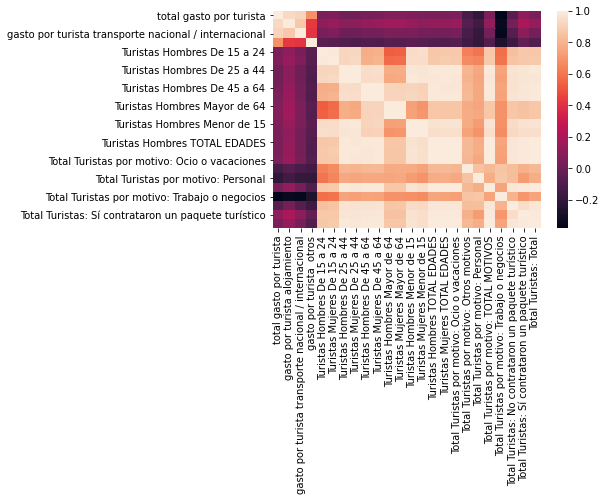

In [17]:
import seaborn as sns
sns.__version__
sns.heatmap(gasto_medio_canarias.corr());